<h2>Fraudulent Transaction Classification:</h2>
<p>This feature would be extremely useful for the bank managers since they would be able to understand if a particular transaction was carried out by some fradulent means. Then, the bank manager can report complain against that account.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for handling the warnings:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# loading the data (csv file) using pandas:
orig_data = pd.read_csv("fraud_dataset_example.csv")
orig_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# creating a copy of the original data since it helps us to perform some new computations:
orig_data_copy = orig_data.copy()
print("Number of Rows in data --> ", orig_data_copy.shape[0])
print("Number of Features in Data -->", orig_data_copy.shape[1])

Number of Rows in data -->  101613
Number of Features in Data --> 11


<h3>Inspecting Missing Values in Data:</h3>

In [4]:
# number of missing values wrt all the features:
orig_data_copy.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<li>Insight: <strong> There doesn't seem to be any missing value in any of the features.</li>

<h3>Categorical and Numerical Features:</h3>

In [5]:
# setting the type of "isFraud" and "isFlaggedFraud" as object:
orig_data_copy["isFraud"] = orig_data_copy["isFraud"].astype("O")
orig_data_copy["isFlaggedFraud"] = orig_data_copy["isFlaggedFraud"].astype("O")

cat_feats = {"less_categories": [], "more_categories": []}
num_feats = []
inp_feats = list(orig_data_copy.columns)
for feat in inp_feats:
    if orig_data_copy[feat].dtype == "O":
        # categorical feature:
        if orig_data_copy[feat].nunique() > 1000:
            # categorical feature with more categories:
            cat_feats["more_categories"].append(feat)
            
        else:
            # categorical feature with less categories:
            cat_feats["less_categories"].append(feat)
            
    else:
        # numerical feature:
        num_feats.append(feat)
        
# Printing the numerical and categorical features:
print("Numerical Features --> ", num_feats)
print("Categorical Features with Less Categories--> ", cat_feats["less_categories"])
print("Categorical Features with More Categories--> ", cat_feats["more_categories"])

Numerical Features -->  ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
Categorical Features with Less Categories-->  ['type', 'isFraud', 'isFlaggedFraud']
Categorical Features with More Categories-->  ['nameOrig', 'nameDest']


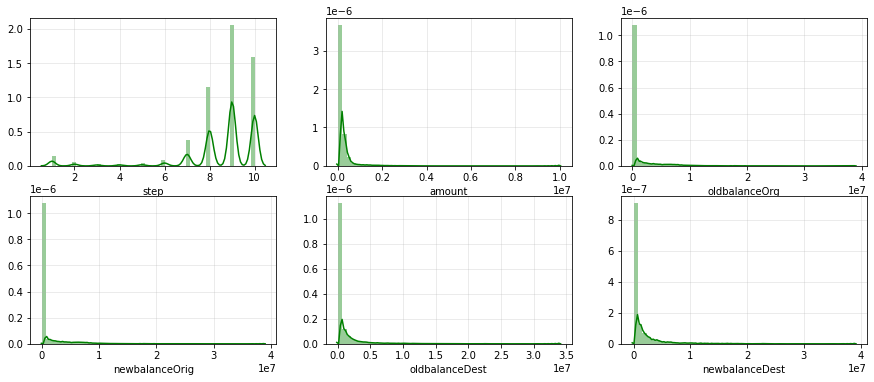

In [6]:
# Distribution of numerical Features:
plt.figure(figsize=(15, 6))
k = 1
for idx in range(len(num_feats)):
    plt.subplot(2, 3, k)
    sns.distplot(orig_data_copy[num_feats[idx]], color='green')
    plt.grid(True, alpha=0.3)
    k +=1

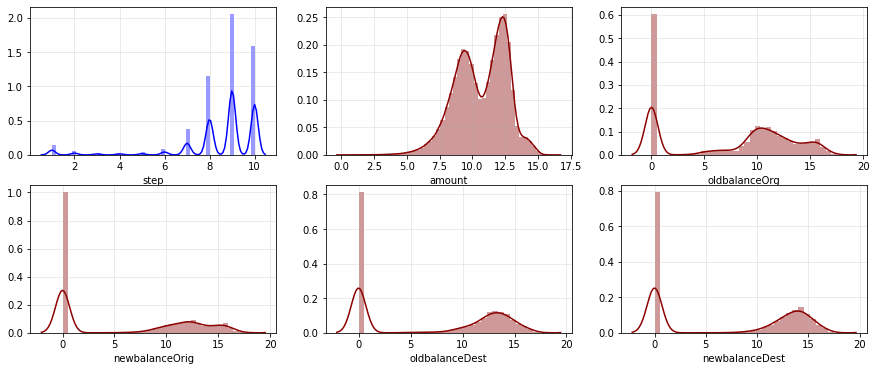

In [7]:
# since the distribution of numerical features seems to be exponential distribution, thus we can try
# taking its logarithm and see if the distribution becomes approximately Gaussian Distribution:


# logarithm of numerical features:
plt.figure(figsize=(15, 6))
k = 1
for idx in range(len(num_feats)):
    plt.subplot(2, 3, k)
    
    if (idx != 0):
        sns.distplot(np.log(orig_data_copy[num_feats[idx]]+1), color='darkred')
        plt.grid(True, alpha=0.3)
    else:
        sns.distplot(orig_data_copy[num_feats[idx]], color='blue')
        plt.grid(True, alpha=0.3)
        
    plt.grid(True, alpha=0.3)
    k +=1

<li>Insight: <strong> In most of the numerical features, we can observe a sharp peak at 0, which illustrates that most of the customers have their balance=0 before and after the transaction is completed for both the originator and destinator. </strong></li>
<p></p>    
<li>Insight: <strong> Since, the distribution of neither of the features are Guassian Distributed, thus we can resort to using Non-Parametric Statistical Tests for deriving important insights from the data. .</strong></li>

<h2>Exploratory Data Analysis:</h2>

<h3>1) Investigate if the Fraud Transaction involves same Originator/Designator multiple times or not?</h3>

In [8]:
class_1_data = orig_data_copy[orig_data_copy["isFraud"]==1]
print("Proportion of Fraudulent Data --> ", (len(class_1_data)/len(orig_data_copy))*100, '%')

Proportion of Fraudulent Data -->  0.11415862143623356 %


In [9]:
# total number of points corresponding to fraud transactions:
print("Length of Fraudulent Transactions", len(class_1_data))

Length of Fraudulent Transactions 116


In [10]:
# storing the unique account names of Originators and Destinators:
name_orig_fraud = list(class_1_data["nameOrig"].unique())
name_dest_fraud = list(class_1_data["nameDest"].unique())

In [11]:
# check the length of unique Account Names for Originator:
print("Length of Unique Originators Name in Data -->", len(orig_data_copy["nameOrig"].unique()))

Length of Unique Originators Name in Data --> 101613


<li>Insight: <strong>All the transaction Originators are unique. Hence, no insight about the Trasaction Originators could be derived.</li>

In [12]:
# check the length of unique Account Names for Destinator:
print("Length of Unique Destinators Name in Data -->", len(orig_data_copy["nameDest"].unique()))

Length of Unique Destinators Name in Data --> 52280


<li>Insight: <strong> It seems some of the Transaction Recipients names are repeated. This could be useful to find the names of the transactors for which <code>"isFraud"==1</code>.</li>

In [13]:
# counting the most often destinators for which isFraud==1:
name_dest_orig = list(orig_data_copy["nameDest"].unique())
result = []

for dest_name in name_dest_fraud:
    cur_count = name_dest_orig.count(dest_name) # computing the count of each Destinator name 
    result.append((dest_name, cur_count))
    
dest_rep_data = pd.DataFrame(result, columns=['Dest Name', 'Count'])
max(dest_rep_data['Count'])

1

<li>Insight: <strong>The destinator/recepient's name does not occur more than once hence, there is no proof of making the fraud from similar account names. Thus, everytime a Fraud is being done, it is being carried out by a new Originator's name and a new Destinator's name. </strong></li>
    
<p></p>
<li>Insight: <strong>Hence, we should resort to remove both the features i.e. <code>nameOrig and nameDest</code>.</li>


In [14]:
# deleting the two features from the categorical features:
del cat_feats["more_categories"]

In [15]:
# renaming cat_feats:
cat_feats = cat_feats["less_categories"]
cat_feats

['type', 'isFraud', 'isFlaggedFraud']

<h3>2) What if all the values of numerical feature ==0 is dropped ?</h3>
<p>The motivation of going ahead with this analysis is that we can clearly see that the distribution of numerical features have quite high proportion of values==0 and hence, it is distorting the distribution of Numerical Feature's Distribution (because if all the values==0 are dropped, then the distribution would be more close to Gaussian Distribution).</p>

In [16]:
# keeping the indexes of numerical features values == 0 in a separate list:

feat_index_0 = set()
for feat in num_feats:
    cur_feat_index = set(orig_data_copy[orig_data_copy[feat]==0.0].index)
    print("Current Feature -->", feat)
    feat_index_0 = feat_index_0.union(cur_feat_index) 
    
len(feat_index_0)

Current Feature --> step
Current Feature --> amount
Current Feature --> oldbalanceOrg
Current Feature --> newbalanceOrig
Current Feature --> oldbalanceDest
Current Feature --> newbalanceDest


82213

In [17]:
# percentage of data lost if values==0 are dropped:
len(feat_index_0)/len(orig_data_copy)*100

80.9079546908368

In [18]:
# number of data points for which none of the feature's value is 0:
len(orig_data_copy)-len(feat_index_0)

19400

In [19]:
# number of data points which have isFraud==1 and none of the numerical feature has value ==0.
# We wanted as less data points for this as possible:

class_1_index = set(class_1_data.index)
common_index = feat_index_0.intersection(class_1_index)
print("Indexes for which 'isFraud'==1 and none of the numerical feats have value==0 -->", len(common_index))

Indexes for which 'isFraud'==1 and none of the numerical feats have value==0 --> 115


<li>Insight: <strong> We cannot drop all the numerical feature's index for which its value is 0 since 115 values are the ones for which <code>isFraud==1</code> and some or the other features have its value==1. Thus, it would be problematic to remove the indexes corresponding to 0 for all numerical features.</li>

<h3>3) Creating a new feature --> <code>diff_orig_dest</code>:</h3>
<p>This feature would correspond to: 
<ol>
    <li><strong>1 --> if Difference in amount before and after the Originator's Account and Destinator's Account is the same </strong>. Since, it means whatever amount has been deducted from the Originator's Account is the same as that of amount added to Designator's Account.</li>
    <li><strong>0 --> if Difference in amount before and after the Originator's Account and Destinator's Account is different.</li>
    </ol>
</p>

In [20]:
# creating a new feature where the difference in Amount of Originator's should be the same as in 
# Destinator's after the transaction is processed:

orig_data_copy["oldbalanceOrig"] = orig_data_copy["oldbalanceOrg"]
orig_data_copy["diff_orig"] = orig_data_copy["newbalanceOrig"] - orig_data_copy["oldbalanceOrig"]
orig_data_copy["diff_dest"] = orig_data_copy["newbalanceDest"] - orig_data_copy["oldbalanceDest"]
orig_data_copy["diff_orig_dest"] = np.where(orig_data_copy["diff_orig"]==orig_data_copy["diff_dest"], 1, 0)

In [21]:
len(orig_data_copy[orig_data_copy["diff_orig_dest"]==1])

11235

<li>Insight: <strong> For 11,235 transactions only, the difference in Originator's Account and difference in Destinator's Account is same. This means, the data reported might be different or there could be multiple transactions happening at the same time in the Recepient's Account. We would later explore if there is any dependence of the target feauture with that of <code>diff_orig_dest</code></li>

In [22]:
# adding the new columns to num_feats:
num_feats.remove("oldbalanceOrg") # removing since its name is mis-spelled
num_feats.extend(["oldbalanceOrig", "diff_orig", "diff_dest"]) # adding some feats to numerical feats
cat_feats.append("diff_orig_dest") # adding some feats to categorical feats
print("Numerical Features --->", num_feats)
print("Categorical Features --->", cat_feats)

Numerical Features ---> ['step', 'amount', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrig', 'diff_orig', 'diff_dest']
Categorical Features ---> ['type', 'isFraud', 'isFlaggedFraud', 'diff_orig_dest']


In [23]:
# testing whether for fraudulent transactions the value of diff_orig_dest==0:
any(orig_data_copy[orig_data_copy["isFraud"]==1]["diff_orig_dest"]==0)

True

<li>Insight: <strong> It is found that for all the fraudulent transactions, the value for <code>diff_orig_dest==0.</code></li>

<h2>Non-Parametric Tests:</h2>
<p>The reason of applying Non-Parametric Tests on this data is because the distribution of numerical features seem to be non-gaussian and we also need to select the features which would prove to be the good predictors of Target feature.</p>

<h3>1) Kruskal Wallis Test:</h3>
<p>It is a non-parametric test which is used to determine if "c" groups come from same population or not. It works more like ANOVA where null hypothesis -> "c" groups are identical and alternate hypothesis -> "c" groups are not identical.</p>

In [24]:
# importing the kruskal() from scipy.stats:
from scipy.stats import kruskal

In [25]:
def kruskal_wallis_num_feats(data, target_feat):
    categories = list(orig_data_copy[target_feat].unique())
    data_categories = []
    result_kruskal = []

    for category in categories:
        data_categories.append(orig_data_copy[orig_data_copy[target_feat]==category])

    for feat in num_feats:
        data_categories_num_feat = []
        data_categories_num_feat = [data_categories[idx][feat] for idx in range(len(data_categories))]
        h_stats, p_val = kruskal(*data_categories_num_feat)

        if p_val < 0.05:
            result_kruskal.append((feat, p_val))
        else:
            continue

    result_kruskal_df = pd.DataFrame(result_kruskal, columns=['Numerical Feature', 'P-Value'])
    return result_kruskal_df

In [26]:
# kruskal wallis test to derive whether the following num feats for fraud and normal transactions come
# from the same distribution or not.
kruskal_table = kruskal_wallis_num_feats(orig_data_copy, "isFraud")
imp_feats_kruskal = list(kruskal_table["Numerical Feature"])
kruskal_table

,Numerical Feature,P-Value
0,step,5.703136e-32
1,newbalanceOrig,1.485443e-20
2,oldbalanceDest,2.801679e-09
3,newbalanceDest,7.516507e-03
4,oldbalanceOrig,1.266187e-04
5,diff_orig,3.018956e-41


In [27]:
# feats considered important by this test:
imp_feats_kruskal

['step',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'oldbalanceOrig',
 'diff_orig']

In [28]:
# important feats:
num_feats

['step',
 'amount',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'oldbalanceOrig',
 'diff_orig',
 'diff_dest']

<li>Insight: <strong> It seems that apart from <code>amount</code>, rest all of the numerical features have P-Values is less than 0.05 i.e. these numerical features seems to explain the variance of the target feature -> <code>isFraud</code>. Thus, <code>amount</code> would not be a significant predictor of the target feature. </li>

<h3>Chi-Square Test of Independence:</h3>
<p>It computes for the dependece of a categorical feature with respect to another categorical feature. Hence, over here, we compute the dependence of categorical features with the target feature i.e. <code>isFraud</code>.</p>

In [29]:
from scipy.stats import chi2_contingency
# creating the contingency table:
def contingency_table(data, cat_feat, target_feat="isFraud"):
    category_prob = []
    for category in data[cat_feat].unique():
        data_category = data[data[cat_feat]==category]
        target_category_prob = []
        for target_cat in data[target_feat].unique():
            target_data_category = data_category[data_category[target_feat]==target_cat]
            target_category_prob.append((len(target_data_category)))
        category_prob.append(target_category_prob)

    analysis_values = np.array(category_prob)
    target_cols = data[target_feat].unique()
    feat_cols = data[cat_feat].unique()
    table = pd.DataFrame(analysis_values, columns=[target_cols], index=[feat_cols])
    return table


# performing the chi-square test of independence to compute the significant categorical features for the target feature:
def chi2_test_of_indep(data, all_cat_feats, target_feat="isFraud"):
    results_ = []
#     num_categories = data[target_feat].nunique()
    print('Chi-square Test of Independence is computed for --> ', target_feat)
    for categorical_feat in all_cat_feats:
        cont_table = contingency_table(data, categorical_feat)
#         print(cont_table)
        p_value = chi2_contingency(cont_table)[1] # chi-square test of independence

        # significant features dependence:
        if p_value<=0.05:
            results_.append((categorical_feat, p_value))
    
        
    test_of_indep_df = pd.DataFrame(results_, columns=['Significant Features', 'P-Values'])
    return test_of_indep_df

In [30]:
# categorical feats for which the Chi-Square Test of Independence has to be carried out:
for rem_feat in ["isFraud", "isFlaggedFraud"]:
    cat_feats.remove(rem_feat)
    
# printing the cat_feats_test:
print(cat_feats)

['type', 'diff_orig_dest']


In [31]:
chi2_table = chi2_test_of_indep(orig_data_copy, cat_feats)
imp_feats_chi2 = list(chi2_table["Significant Features"])
chi2_table

Chi-square Test of Independence is computed for -->  isFraud


,Significant Features,P-Values
0,type,1.074350e-65
1,diff_orig_dest,2.607862e-04


<li>Insight: <strong>Both the features seem to be significantly dependent on the target feature i.e. <code>isFraud</code>.</li>

In [32]:
# significant features using chi_square test of independence:
imp_feats_chi2

['type', 'diff_orig_dest']

In [33]:
# important features:
imp_feats = []
imp_feats.extend(imp_feats_kruskal)
imp_feats.extend(imp_feats_chi2)

# printing the numerical feats:
imp_feats

['step',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'oldbalanceOrig',
 'diff_orig',
 'type',
 'diff_orig_dest']

<h3>4) Relationship between Categorical Features and Target Feature:</h3>

In [34]:
# Relationship between the target feature and each category of "type":
contingency_table(orig_data_copy, "type")

,0,1
PAYMENT,40062,0
TRANSFER,8632,57
CASH_OUT,31251,59
DEBIT,1012,0
CASH_IN,20540,0


<li>Insight: <strong>The Fraudulent Transactions occur too less in numbers as compared to normal transactions and they seem to occur from only 2 modes of Transaction i.e. <code>PAYMENT and CASH_OUT</code>.</strong></li>

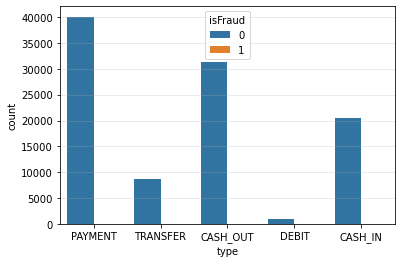

In [35]:
# plot to represent the above table:
plt.grid(True, alpha=0.3)
sns.countplot(x="type", data=orig_data_copy, hue="isFraud")

<li>Insight: <strong>The proportion of Fraudulent Transactions is so less that the "Orange" bar is not even visible.</li>

In [36]:
# Relationship between the target feature and each category of "diff_orig_dest":
contingency_table(orig_data_copy, "diff_orig_dest")

,0,1
0,90262,116
1,11235,0


<li>Insight: <strong>All of the Fraudulent Transactions have their <code>diff_orig_dest = 0</code> which means the amount deducted from the originator's account is different from the amount which got added to the designator's account.</li>

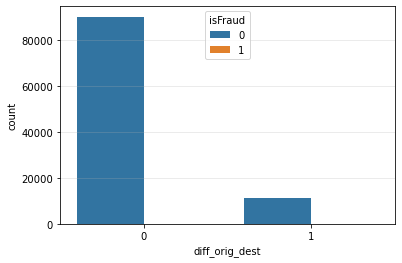

In [37]:
# plot to represent the above table:
plt.grid(True, alpha=0.3)
sns.countplot(x="diff_orig_dest", data=orig_data_copy, hue="isFraud")

In [38]:
# Relationship between the target feature and each category of "step":
contingency_table(orig_data_copy, "step")

,0,1
1,2692,16
2,1006,8
3,548,4
4,555,10
5,659,6
6,1638,22
7,6825,12
8,21085,12
9,37609,19
10,28880,7


<h3>5) Analyzing the Scatter Plots:</h3> 
<p>Now, we would be analyzing the scatter plots between each of the numerical feature. It would help us to see where the Fraudulent Points are present and what algorithms we can use to differentiate them from the normal data points.</p>

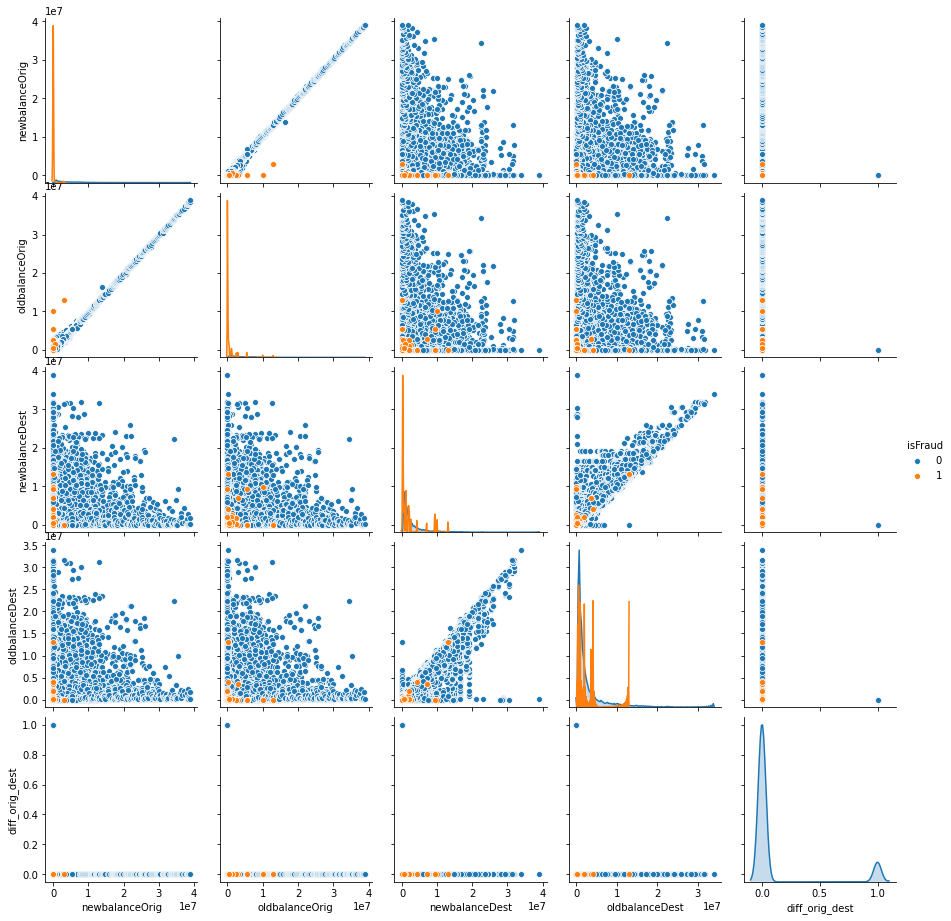

In [39]:
# creating a pairplot with multiple numerical features:
sns.pairplot(orig_data_copy, hue="isFraud", vars=["newbalanceOrig", "oldbalanceOrig", "newbalanceDest", "oldbalanceDest", "diff_orig_dest"])

<h3>Important Observations:</h3>
<p>
<li>The scatter plot between <code>newbalanceOrig and oldbalanceOrig</code> to a greater extent differentiates the Fraudulent Points from the denser region.</li>
<li>The scatter plot between <code>newbalanceDest and oldbalanceDest</code> seems to overlap the data of 2 classes. However, the data of Fraudulent Transactions are located towards the extreme left portion of the graph i.e. they have very less values.</li>
<li>Fraudulent transactions have <code>diff_orig_dest==0</code>.</li>
</p>

<h3>Algorithms:</h3>
<p> The algorithms which could be applied to seperate the Fraudulent Transactions from the Normal Transactions are as follows:
    <p>
<li><strong>DBSCAN (Density Based) </strong> but it does not predict in real time whether a transaction would be fraudulent or not.</li>
<li><strong>LOF (Relative Density)</li>
<li><strong>Isolation Forest</li>
    </p>
    

<h3>Encoding Data:</h3>
<p>Here, we would like to:
    <ol>
        <li>Perform Min-Max Scaling on Numerical Features.</li>
        <li>Perform One-Hot Encoding on Categorical Features.</li>
    </ol>
</p>

In [39]:
# function for encoding data:
def encoding_data(full_data, target_feature='isFraud'):
    full_data_copy = full_data.copy()
    target_y = full_data_copy[target_feature]
    input_x = full_data_copy.drop([target_feature], axis=1)
    
    # iterating over each 
    for each_feat in list(input_x.columns):
        if full_data[each_feat].nunique() >= 10:
            # a numerical feature: Perform min-max scaling: 
            min_val = min(input_x[each_feat])
            max_val = max(input_x[each_feat])
            range_val = max_val - min_val
            input_x[each_feat] = (input_x[each_feat]-min_val)/range_val 
            
            # printing the max, min and range for each numerical feature for processing data in 
            # real-time while making predictions:
            print(each_feat)
            print('Minimum Value --> ', min_val)
            print('Maximum Value --> ', max_val)
            print('Range --> ', range_val)
            print('============================== \n\n')
            
        else:
            # a categorical feature:
            if input_x[each_feat].nunique()>2:
#                 print(each_feat)
                # for multinomial categorical feature
                for category in input_x[each_feat].unique(): # iterate over each category of the multi. categorical feature:
                    input_x[each_feat + '_' + str(category)] = np.where(input_x[each_feat]==category, 1, 0)
                
                # removing the categorical feature once encoded:
                input_x = input_x.drop([each_feat], axis=1)
            else:
                continue

    return input_x, target_y

In [40]:
imp_feats.append("isFraud") # appending target feature in data

# encoding data:
imp_data = orig_data_copy[imp_feats]
input_x, target_y = encoding_data(imp_data)

step
Minimum Value -->  1
Maximum Value -->  10
Range -->  9


newbalanceOrig
Minimum Value -->  0.0
Maximum Value -->  38946233.02
Range -->  38946233.02


oldbalanceDest
Minimum Value -->  0.0
Maximum Value -->  34008736.98
Range -->  34008736.98


newbalanceDest
Minimum Value -->  0.0
Maximum Value -->  38946233.02
Range -->  38946233.02


oldbalanceOrig
Minimum Value -->  0.0
Maximum Value -->  38939424.03
Range -->  38939424.03


diff_orig
Minimum Value -->  -10000000.0
Maximum Value -->  1289407.9100000001
Range -->  11289407.91




In [41]:
# input data: 
input_x

,step,newbalanceOrig,oldbalanceDest,newbalanceDest,oldbalanceOrig,diff_orig,diff_orig_dest,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN
0,0.0,0.004116,0.000000,0.000000,0.004369,0.884914,0,1,0,0,0,0
1,0.0,0.000498,0.000000,0.000000,0.000546,0.885621,0,1,0,0,0,0
2,0.0,0.000000,0.000000,0.000000,0.000005,0.885770,0,0,1,0,0,0
3,0.0,0.000000,0.000623,0.000000,0.000005,0.885770,0,0,0,1,0,0
4,0.0,0.000767,0.000000,0.000000,0.001067,0.884752,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,1.0,0.000000,0.000000,0.000000,0.000020,0.885717,0,1,0,0,0,0
101609,1.0,0.000000,0.002798,0.002344,0.005659,0.866269,0,0,0,1,0,0
101610,1.0,0.000000,0.000000,0.000000,0.000000,0.885786,1,1,0,0,0,0
101611,1.0,0.000000,0.015926,0.056153,0.000041,0.885644,0,0,1,0,0,0


In [42]:
# target feature:
target_y

0         0
1         0
2         1
3         1
4         0
         ..
101608    0
101609    0
101610    0
101611    0
101612    0
Name: isFraud, Length: 101613, dtype: object

<h3>Principal Component Analysis for Visualization:</h3>
<p>The reason of proceeding with PCA is to compress the data to 2-Dimensional since it can be plotted on 2-D graph and we can have a look at how the fraudulent transactions differ from the normal transactions, although we would be loosing some amount of variance in dropping the features.</p>

In [43]:
# importing the PCA class from sklearn.decomposition:
from sklearn.decomposition import PCA

In [44]:
# fitting PCA to reduce the dimensionality of data so as to visualize data in 2-D Space:
pca = PCA(n_components=2)
pca.fit(input_x)

PCA(n_components=2)

In [45]:
# 70% variance of the original data has been explained by the 2 Principal Components Vector:
pca.explained_variance_ratio_

array([0.43335957, 0.27934754])

In [46]:
# Shape of Input Data:
input_x.shape

(101613, 12)

In [47]:
# Shape of Transformed Vector of 2 Principal Components which represents maximum variance of Data:
pca_comp = pca.components_.T
pca_comp.shape

(12, 2)

In [48]:
# getting the compressed data by computing the dot product of the input with the transpose of the 2 principal vectors which 
# retain the highest variance:
comp_data = np.dot(input_x, pca_comp)
comp_data.shape

(101613, 2)

Text(0.5, 1.0, 'Visualizing Fraudulent Transactions')

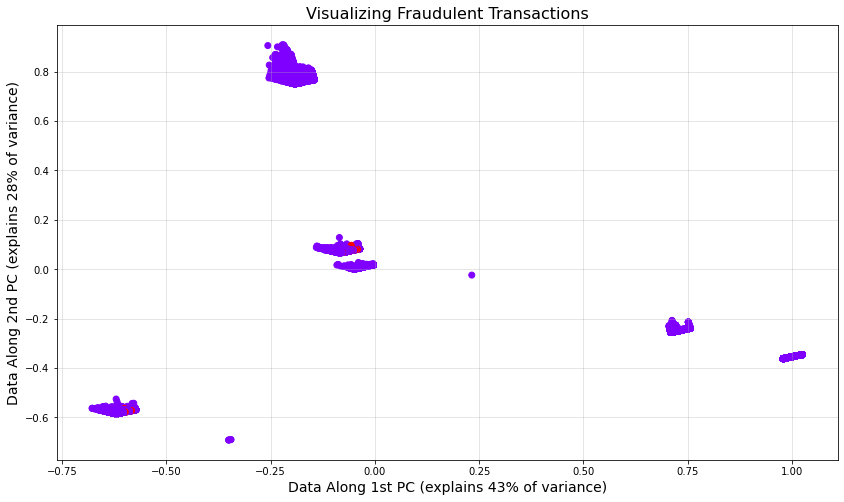

In [49]:
plt.figure(figsize=(14, 8))
plt.scatter(comp_data[:, 0], comp_data[:, 1], c=target_y, cmap='rainbow')
plt.xlabel("Data Along 1st PC (explains 43% of variance)", fontsize=14)
plt.ylabel("Data Along 2nd PC (explains 28% of variance)", fontsize=14)
plt.grid(True, alpha=0.4)
plt.title("Visualizing Fraudulent Transactions", fontsize=16)

<li>Insight: <strong>It can be observed that Fraudulent Transactions occur only in 2 cluster of data points and that to towards the region of low-density in each clusters i.e. towards the right-side of the cluster where there doesn't seem to be a lot of data points belonging to Normal Transactions.</strong></li>
<p>
    <li>Insight: <strong>Further, we can also use the same plot to see how our algorithms work and make predictions on test/validation data.</li>


<h2>Splitting Data in Training and Validation:</h2>
<p>Here, we want to split the original data into training and validation data.</p>

In [43]:
# function which splits data: 
# our aim is to keep the data wrt "fraud==0" in training data and keep all the "fraud==1" along with some of "fraud==0" data together:
def splitting_train_val(prop_target, full_data, target_feat_data):
    """We know that the target class is binary and the number of instances for both the class are equal, hence perform stratified Sampling"""
    
    # defining the proportion of training and validation data beforehand:
    total_train_idx = int(len(full_data)*0.95)
    total_val_idx = int(len(full_data)*0.05)
    
    # creating the new feature "target" in full_data and then separating data based upon target class:
    full_data['target'] = target_feat_data
    class_0_data = full_data[full_data['target']==0]
    class_1_data = full_data[full_data['target']==1]
    
#   proportion of target data to be included in training data:
    train_target_idx = int(prop_target*len(class_1_data)) 
    train_input_idx = total_train_idx - train_target_idx
    
    # creating train data:
    train_0_data = class_0_data[:train_input_idx]
    train_1_data = class_1_data[:train_target_idx]
    full_train_data = pd.concat([train_0_data, train_1_data], axis=0).sample(frac=1) # shuffling the data as well
    train_target = full_train_data['target'] 
    train_data = full_train_data.drop(['target'], axis=1)
    
    # creating val data:
    val_0_data = class_0_data[train_input_idx:]
    val_1_data = class_1_data[train_target_idx:]
    full_val_data = pd.concat([val_0_data, val_1_data], axis=0).sample(frac=1) # shuffling the data as well
    val_target = full_val_data['target']
    val_data = full_val_data.drop(['target'], axis=1)
    
    return (train_data, train_target, val_data, val_target)

In [44]:
# creating training and validation data:
# Note, 90% of the total fraudulent examples are kept in training data:
(x_train, y_train, x_val, y_val) = splitting_train_val(0.0, input_x, target_y)
print("Shape of Input Training Data --->", x_train.shape)
print("Shape of Target Training Data --->", y_train.shape)
print("Class-1 Data in Training Data --->", len(y_train[y_train==1]))
print("Class-0 Data in Training Data --->", len(y_train[y_train==0]))
print("===================================================")
print("Shape of Input Validation Data --->", x_val.shape)
print("Shape of Target Validation Data --->", y_val.shape)
print("Class-1 Data in Validation Data --->", len(y_val[y_val==1]))
print("Class-0 Data in Validation Data --->", len(y_val[y_val==0]))
print("===================================================")

Shape of Input Training Data ---> (96532, 12)
Shape of Target Training Data ---> (96532,)
Class-1 Data in Training Data ---> 0
Class-0 Data in Training Data ---> 96532
Shape of Input Validation Data ---> (5081, 12)
Shape of Target Validation Data ---> (5081,)
Class-1 Data in Validation Data ---> 116
Class-0 Data in Validation Data ---> 4965


In [45]:
# setting the dtype of y_train and y_val:
y_train = y_train.astype('int32')
y_val = y_val.astype('int32')

<h2>Evaluating Anomaly Detection Algorithms:</h2>

In [46]:
# code for evaluating a Machine Learning Alogrithm:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# evaluation table returns the table comparision between the training and validation metrics:  
def evaluation_table(y_train, y_train_pred, y_val, y_val_pred):
    # training performance metrics:
    accuracy_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    train_perf = [accuracy_train, prec_train, recall_train, f1_train, roc_train]
    
    # validation performance metrics:
    accuracy_val = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    roc_val = roc_auc_score(y_val, y_val_pred)
    val_perf = [accuracy_val, prec_val, recall_val, f1_val, roc_val]
    
    # forming a table:
    result = []
    for train_p, val_p in zip(train_perf, val_perf):
        result.append((train_p, val_p))
        
    result_table = pd.DataFrame(result, columns=['Training Metrics', 'Validation Metrics'], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score'])
    return result_table

# evaluation table only on validation data:
def evaluation_table_val(y_val, y_val_pred):
    # validation performance metrics:
    accuracy_val = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    roc_val = roc_auc_score(y_val, y_val_pred)
    val_perf = [accuracy_val, prec_val, recall_val, f1_val, roc_val]
    
    # forming a table:
    result = []
    for val_p in val_perf:
        result.append(val_p)
        
    result_table = pd.DataFrame(result, columns=['Validation Metrics'], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score'])
    return result_table

# make_predictions on both data:
def make_predictions(best_model):
    # predicting output for training data:
    y_train_pred = best_model.predict(x_train)
    y_train_pred = np.where(y_train_pred == -1, 1, 0) 
    
    # predicting output for validation data:
    y_val_pred = best_model.predict(x_val)
    y_val_pred = np.where(y_val_pred == -1, 1, 0)
    return y_train_pred, y_val_pred

# make predictions only on val data:
def make_predictions_val(best_model):
    # predicting output for validation data:
    y_val_pred = best_model.predict(x_val)
    y_val_pred = np.where(y_val_pred == -1, 1, 0)
    return y_val_pred


# make predictions only on training data:
def make_predictions_train(best_model):
    # predicting output for training data:
    y_train_pred = best_model.predict(x_train)
    y_train_pred = np.where(y_train_pred == -1, 1, 0) 
    return y_train_pred


# get the confusion matrix:
def get_confusion_matrix(y_val, y_val_pred):
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=["Pred-0", "Pred-1"], index=["Actual-0", "Actual-1"])
    return conf_matrix_df
    

# printing the Confusion Matrix along with the evaluation table:
def print_eval_metrics(best_model):
    # make predictions:
    y_train_pred, y_val_pred = make_predictions(best_model)
    
    # printing the Evaluation Table:
    eval_result_table = evaluation_table(y_train, y_train_pred, y_val, y_val_pred)
    print('Evaluation Table for '+title, end="\n")
    print(eval_result_table, end="\n\n\n")
    
    # printing the confusion matrix:
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=["Pred-0", "Pred-1"], index=["Actual-0", "Actual-1"])
    print("Confusion Matrix for "+ title, end="\n")
    print(conf_matrix_df)
    return True

<h2>Anomaly Detection Modelling:</h2>
<p>Here, I would be training the data on multiple anomaly detection algorithms and evaluate the performance of each of the algorithm using the Performance Metrics of Classifiers.</p>

<h3>1) Local Outlier Factor (LOF):</h3>
<p>The algorithm separates the normal data points from those of the outliers based upon the relative density approach where the k-nearest neighbours are chosen and then density of each data point is computed with respect to its neighbours and the points which seem to have low relative density are the ones which are raised as outliers.</p>

In [47]:
# class for plotting evaluation metrics for LOF:
from sklearn.neighbors import LocalOutlierFactor
class PlotEvaluationMetricLOF:
    def __init__(self, val_data):
        self.y_val = val_data
    
    # plotting evaluation metrics of LOF based upon various values of contamination:
    def plot_lof_metrics_cont(self, list_of_cont, n_neighbor):
        accuracy_val = []
        prec_val = []
        recall_val = []
        f1_score_val = []
        auc_score_val =  []

        # since proportion of outliers in data = 0.00114158, hence contamination=0.00114158: 
        for cur_cont in list_of_cont:
            clf = LocalOutlierFactor(n_neighbors = n_neighbor, contamination=cur_cont, novelty=True)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            eval_table = evaluation_table_val(self.y_val, y_val_pred)
            val_metrics = list(eval_table["Validation Metrics"])
            print("Classifier with contamination="+str(cur_cont)+" is done")

            # appending the value of each metric in its own list:
            for array_list_metric, idx in zip([accuracy_val, prec_val, recall_val, f1_score_val, auc_score_val], list(range(5))):
                array_list_metric.append(val_metrics[idx])

        plt.figure(figsize=(20, 8))   
        # plot-1:
        plt.subplot(1, 2, 1);
        plt.plot(list_of_cont, accuracy_val, 'r-o', label='Accuracy')
        plt.plot(list_of_cont, prec_val, 'b-o', label='Precision')
        plt.plot(list_of_cont, recall_val, 'g-o', label='Recall')
        plt.plot(list_of_cont, f1_score_val, 'm-o', label='F1-Score')
        plt.plot(list_of_cont, auc_score_val, 'k-o', label='AUC-Score')
        plt.xlabel("Contamination Values", fontsize=12)
        plt.ylabel("Value of Eval. Metrics", fontsize=12)
        plt.title("Contamination LOF Plot", fontsize=14)
        plt.grid(True, alpha=0.4)
        plt.legend()
        
        
        # plot_2: plotting multiple bars of Precision, Recall, Accuracy and F1-Score:
        plt.subplot(1, 2, 2);
        x_axis = np.arange(len(list_of_cont))
        plt.bar(x_axis-0.2, accuracy_val, 0.1, label="Accuracy")
        plt.bar(x_axis-0.1, prec_val, 0.1, label="Precision")
        plt.bar(x_axis+0.0, recall_val, 0.1, label="Recall")
        plt.bar(x_axis+0.1, f1_score_val, 0.1, label="F1_Score")
        plt.bar(x_axis+0.2, auc_score_val, 0.1, label="AUC Score")
        plt.xticks(x_axis, list_of_cont)
        plt.grid(True, alpha=0.4)
        plt.xlabel("Contamination Values", fontsize=12)
        plt.ylabel("Evaluation Metrics Values", fontsize=12)
        plt.title("Contamination LOF Plot", fontsize=14)
        plt.legend()
        
        result = {"accuracy_list": accuracy_val, "precision_list":prec_val, "recall_list":recall_val, "f1_score_list":f1_score_val, "auc_score_list":auc_score_val}
        return result
        
    # plotting evaluation metrics of LOF based upon various values of nearest neighbors:
    def plot_lof_metrics_neighbors(self, list_k_neighbors):
        accuracy_val = []
        prec_val = []
        recall_val = []
        f1_score_val = []
        auc_score_val =  []
 
        for k_neighbor in list_k_neighbors:
            clf = LocalOutlierFactor(n_neighbors = k_neighbor, novelty=True)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            eval_table = evaluation_table_val(self.y_val, y_val_pred)
            val_metrics = list(eval_table["Validation Metrics"])
            print("Classifier with "+str(k_neighbor)+" is done")

            # appending the value of each metric in its own list:
            for array_list_metric, idx in zip([accuracy_val, prec_val, recall_val, f1_score_val, auc_score_val], list(range(5))):
                array_list_metric.append(val_metrics[idx])
        
        plt.figure(figsize=(20, 8))
        # plot-1:
        plt.subplot(1, 2, 1);
        plt.plot(list_k_neighbors, accuracy_val, 'r-o', label='Accuracy')
        plt.plot(list_k_neighbors, prec_val, 'b-o', label='Precision')
        plt.plot(list_k_neighbors, recall_val, 'g-o', label='Recall')
        plt.plot(list_k_neighbors, f1_score_val, 'm-o', label='F1-Score')
        plt.plot(list_k_neighbors, auc_score_val, 'k-o', label='AUC-Score')
        plt.xlabel("Neighbors Values", fontsize=12)
        plt.ylabel("Value of Eval. Metrics", fontsize=12)
        plt.title("K-Neighbors LOF Plot", fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.4)
        
        # plot_2: plotting multiple bars of Precision, Recall, Accuracy and F1-Score:
        plt.subplot(1, 2, 2);
        x_axis = np.arange(len(list_k_neighbors))
        plt.bar(x_axis-0.2, accuracy_val, 0.1, label="Accuracy")
        plt.bar(x_axis-0.1, prec_val, 0.1, label="Precision")
        plt.bar(x_axis+0.0, recall_val, 0.1, label="Recall")
        plt.bar(x_axis+0.1, f1_score_val, 0.1, label="F1_Score")
        plt.bar(x_axis+0.2, auc_score_val, 0.1, label="AUC Score")
        plt.xticks(x_axis, list_k_neighbors)
        plt.grid(True, alpha=0.4)
        plt.xlabel("Number of Neighbors", fontsize=14)
        plt.ylabel("Evaluation Metrics Values", fontsize=14)
        plt.title("K-Neighbors LOF Plot", fontsize=14)
        plt.legend()
        result = {"accuracy_list": accuracy_val, "precision_list":prec_val, "recall_list":recall_val, "f1_score_list":f1_score_val, "auc_score_list":auc_score_val}
        return result
     
    # printing confusion_matrix and eval_metrics_table for LOF based upon various values of contamination:
    def get_conf_matrix_eval_metrics_cont(self, list_of_cont, n_neighbor):
        # since proportion of outliers in data = 0.00114158, hence contamination=0.00114158:
        print("Actual Number of Outliers Present --> ", len(y_val[y_val==1]), end="\n\n")
        for cur_cont in list_of_cont:
            clf = LocalOutlierFactor(n_neighbors=n_neighbor, novelty=True, contamination = cur_cont)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            print("Number of Outlier Points detected --> ", len(y_val_pred[y_val_pred==1]))
            print("For Model with contamination=" + str(cur_cont) + ", Confusion Matrix:")
            conf_mat_table = get_confusion_matrix(self.y_val, y_val_pred)
            print(conf_mat_table, end="\n\n")
            eval_table = evaluation_table_val(self.y_val, y_val_pred)
            print("Evaluation metrics for model with n_estimator="+str(cur_cont)+" :")
            print(eval_table, end="\n\n\n")
    
    # printing confusion_matrix and eval_metrics_table for LOF based upon various values of nearest neighbors:
    def get_conf_matrix_eval_metrics_neighbors(self, k_neighbors):
        print("Actual Number of Outliers Present --> ", len(y_val[y_val==1]), end="\n\n")
        for neighbor in k_neighbors:
            clf = LocalOutlierFactor(n_neighbors=neighbor, novelty=True)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            print("Number of Outlier Points detected --> ", len(y_val_pred[y_val_pred==1]))
            print("For Model with k_neighbors=" + str(neighbor) + ", Confusion Matrix:")
            conf_mat_table = get_confusion_matrix(self.y_val, y_val_pred)
            print(conf_mat_table, end="\n\n")
            eval_table = evaluation_table_val(self.y_val, y_val_pred)
            print("Evaluation metrics for model with k_neighbors="+str(neighbor)+" :")
            print(eval_table, end="\n\n\n")

In [48]:
# creating instance of PlotEvaluationMetricLOF:
lof = PlotEvaluationMetricLOF(y_val)
lof # address where the object is created is visible in hexadecimal

<h3>Choosing Best Value of <code>n_neighbors</code>:</h3>

Classifier with 20 is done
Classifier with 30 is done
Classifier with 50 is done
Classifier with 80 is done


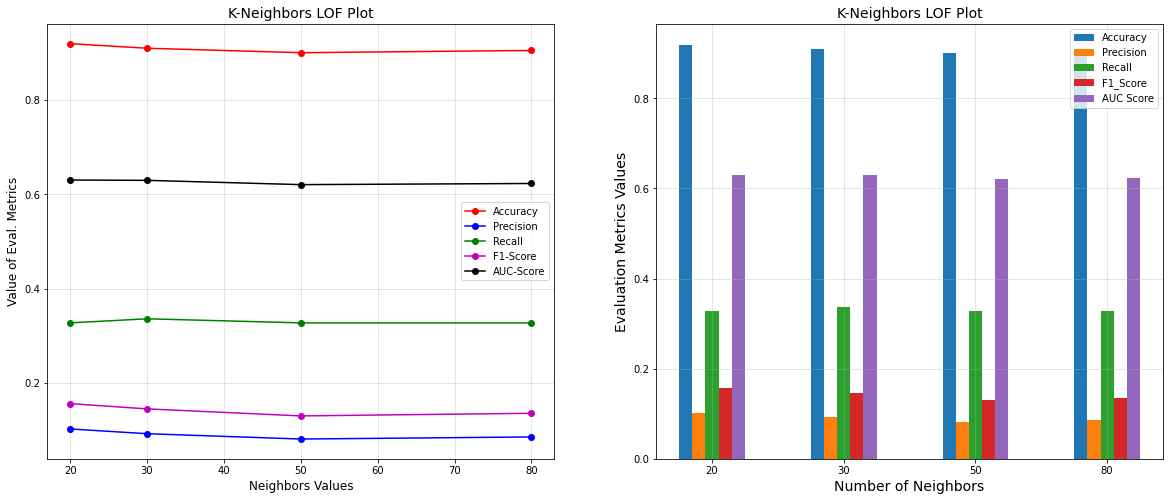

In [97]:
# possible values for neighbors:
poss_val_neighbors = [20, 30, 50, 80]

# plotting and comparing the LOF model on various values of Contamination:
result = lof.plot_lof_metrics_neighbors(poss_val_neighbors)

<li>Insight: <strong>It is clearly visible that for almost all of the above nearest neighbors values i.e. <code>20, 30, 50, and 80</code>, the evaluation metrics almost remains the same. Hence, we should go ahead and see how the confusion matrix is working and how many of the anomalies are correctly predicted, and then only we can decide which value should be considered for n_neighbors.</strong></li>

In [99]:
# priting the eval metrics and confusion matrix based on neighbors:
lof.get_conf_matrix_eval_metrics_neighbors(poss_val_neighbors)

Actual Number of Outliers Present -->  116

Number of Outlier Points detected -->  370
For Model with k_neighbors=20, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4633     332
Actual-1      78      38

Evaluation metrics for model with k_neighbors=20 :
           Validation Metrics
Accuracy             0.919307
Precision            0.102703
Recall               0.327586
F1-Score             0.156379
AUC Score            0.630359


Number of Outlier Points detected -->  421
For Model with k_neighbors=30, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4583     382
Actual-1      77      39

Evaluation metrics for model with k_neighbors=30 :
           Validation Metrics
Accuracy             0.909663
Precision            0.092637
Recall               0.336207
F1-Score             0.145251
AUC Score            0.629634


Number of Outlier Points detected -->  467
For Model with k_neighbors=50, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4536     429
Actual-1    

<li>Insight: <strong>Here, if we observe the number of <code>True Positives </code>, then they remain the same for all of the different values which are tested for n_neighbors. Hence, we should proceed with <code>n_neighbors=20</code>, since it would require the least computations and it is also the default value of n_neighbors assigned by the developers.</strong></li>

<h3>Choosing Best Value of <code>contamination</code>:</h3>

Classifier with contamination=0.0011 is done
Classifier with contamination=0.011 is done
Classifier with contamination=0.023 is done
Classifier with contamination=0.09 is done


{'accuracy_list': [0.9777602834087779,
  0.9567014367250541,
  0.9387915764613265,
  0.8547530013776815],
 'precision_list': [0.5714285714285714,
  0.17088607594936708,
  0.12355212355212356,
  0.06805555555555555],
 'recall_list': [0.10344827586206896,
  0.23275862068965517,
  0.27586206896551724,
  0.4224137931034483],
 'f1_score_list': [0.17518248175182483,
  0.1970802919708029,
  0.17066666666666666,
  0.1172248803827751],
 'auc_score_list': [0.5508177935201584,
  0.6031869639198528,
  0.6150710143417717,
  0.6436338854741814]}

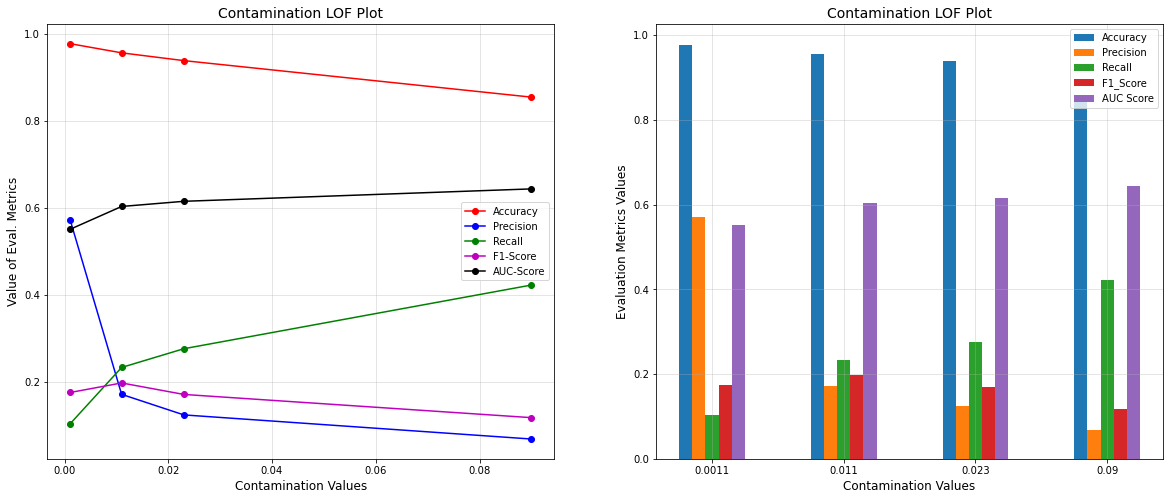

In [105]:
# possible values of contamination:
lof = PlotEvaluationMetricLOF(y_val)
poss_val_contamination = [0.0011, 0.011, 0.023, 0.09]

# plotting and comparing the LOF model on various values of Contamination:
# n_neighbor is the argument for both the "cont functions":
result = lof.plot_lof_metrics_cont(poss_val_contamination, 20)

<p>
The observations are as follows:
    <ol>
        <li>As the contamination parameter increases, the number of outliers also increase.</li>
         <li>Precision value reduces as contamination increases since the number of outliers do increase in large proportion but the the number of correctly predicted anomalies do not increases in that proprtion.</li>
         <li>As precisione reduces, recall increases since there exists a trade-off between the both.</li>
         <li>f1_score and auc_score is maximum for <code>contamination=0.011</code>. Hence, we should be choosing this value for final modelling.</li>
        <li><strong>But, after evaluating the above model visually i.e. plotting the predicted and actual labels, there seems to be a lot of error and hence I resorted to finally keep the value of <code>contamination=0.001123 (which is nothing but the amount of anomalous data points in our actual data).</code> This seems to work really good and later down the notebook, we can have a look at the predicted and actual labels.</li>
         </ol>
</p>

In [106]:
# printing the evaluation metrics and confusion matrix:
result = lof.get_conf_matrix_eval_metrics_cont(poss_val_contamination, 20)

Actual Number of Outliers Present -->  116

Number of Outlier Points detected -->  21
For Model with contamination=0.0011, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4956       9
Actual-1     104      12

Evaluation metrics for model with n_estimator=0.0011 :
           Validation Metrics
Accuracy             0.977760
Precision            0.571429
Recall               0.103448
F1-Score             0.175182
AUC Score            0.550818


Number of Outlier Points detected -->  158
For Model with contamination=0.011, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4834     131
Actual-1      89      27

Evaluation metrics for model with n_estimator=0.011 :
           Validation Metrics
Accuracy             0.956701
Precision            0.170886
Recall               0.232759
F1-Score             0.197080
AUC Score            0.603187


Number of Outlier Points detected -->  259
For Model with contamination=0.023, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    473

<li>Insight: <strong>Model LocalOutlierFactor with <code>n_neighbors=20 and contamination=0.0011</code></strong></li>

In [115]:
# final Lof model;
final_lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.0011, novelty=True)
final_lof_model

LocalOutlierFactor(contamination=0.0011, novelty=True)

<h3>2) Isolation Forest:</h3>
<p>The algorithm now creates multiple Decision Trees where the feature to split the data and the threshold value of that feature is chosen randomly and the tree is created. Similarly a lot of Decision trees are created and since outliers/anomalies tend to have values quite different from most of the data points, hence, they are separated towards the beginning of the tree formation i.e. the tree depth of outliers is small and for inliers, it is large.</p>

<p>From our exploration of data, we found:
    <ol>
        <li>Bank Balance for Originator or Designator is pretty low for Fraudulent Transactions.</li>
        <li>Fraudulent Transactions are present for modes -> Transfer and Cash-out only.</li>
        </ol>
</p>

<p>The very first point of analysis mentioned above might be of help and Isolation Forest might be the right algorithm to work with such a problem as ours..</p>

In [49]:
# class for plotting evaluation metrics for LOF:
from sklearn.ensemble import IsolationForest
class PlotEvaluationMetricIsolationForest:
    def __init__(self, val_data):
        self.y_val = val_data
    
    # plotting evaluation metrics on graph based upon various values of contamination:
    def plot_metrics_cont(self, list_of_cont, estimators):
        accuracy_val = []
        prec_val = []
        recall_val = []
        f1_score_val = []
        auc_score_val =  []

        # since proportion of outliers in data = 0.00114158, hence contamination=0.00114158: 
        for cur_cont in list_of_cont:
            clf = IsolationForest(n_estimators = estimators, contamination=cur_cont, bootstrap=True)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            eval_table = evaluation_table_val(self.y_val, y_val_pred)
            val_metrics = list(eval_table["Validation Metrics"])
            print("Classifier with contamination="+str(cur_cont)+" is done")

            # appending the value of each metric in its own list:
            for array_list_metric, idx in zip([accuracy_val, prec_val, recall_val, f1_score_val, auc_score_val], list(range(5))):
                array_list_metric.append(val_metrics[idx])

        plt.figure(figsize=(20, 8))
        # plot-1:
        plt.subplot(1, 2, 1);
        plt.plot(list_of_cont, accuracy_val, 'r-o', label='Accuracy')
        plt.plot(list_of_cont, prec_val, 'b-o', label='Precision')
        plt.plot(list_of_cont, recall_val, 'g-o', label='Recall')
        plt.plot(list_of_cont, f1_score_val, 'm-o', label='F1-Score')
        plt.plot(list_of_cont, auc_score_val, 'k-o', label='AUC-Score')
        plt.xlabel("Contamination Values", fontsize=12)
        plt.ylabel("Value of Eval. Metrics", fontsize=12)
        plt.title("Contamination Isolation Forest Plot", fontsize=14)
        plt.legend()
        plt.grid(True, alpha=0.4)
        
        # plot_2: plotting multiple bars of Precision, Recall, Accuracy and F1-Score:
        plt.subplot(1, 2, 2);
        x_axis = np.arange(len(list_of_cont))
        plt.bar(x_axis-0.2, accuracy_val, 0.1, label="Accuracy")
        plt.bar(x_axis-0.1, prec_val, 0.1, label="Precision")
        plt.bar(x_axis+0.0, recall_val, 0.1, label="Recall")
        plt.bar(x_axis+0.1, f1_score_val, 0.1, label="F1_Score")
        plt.bar(x_axis+0.2, auc_score_val, 0.1, label="AUC Score")
        plt.xticks(x_axis, list_of_cont)
        plt.grid(True, alpha=0.4)
        plt.xlabel("Contamination Values", fontsize=12)
        plt.ylabel("Evaluation Metrics Values", fontsize=12)
        plt.title("Contamination Isolation Forest Plot", fontsize=15)
        plt.legend()
        
        result = {"accuracy_list": accuracy_val, "precision_list":prec_val, "recall_list":recall_val, "f1_score_list":f1_score_val, "auc_score_list":auc_score_val}
        return result
    
    # plotting evaluation metrics on graph based upon various values of n_estimators:
    def plot_metrics_estimators(self, list_of_estimators):
        accuracy_val = []
        prec_val = []
        recall_val = []
        f1_score_val = []
        auc_score_val =  []
 
        for cur_est in list_of_estimators:
            clf = IsolationForest(n_estimators=cur_est, bootstrap=True)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            eval_table = evaluation_table_val(self.y_val, y_val_pred)
            val_metrics = list(eval_table["Validation Metrics"])
            print("Classifier with n_estimator="+str(cur_est)+" is done")

            # appending the value of each metric in its own list:
            for array_list_metric, idx in zip([accuracy_val, prec_val, recall_val, f1_score_val, auc_score_val], list(range(5))):
                array_list_metric.append(val_metrics[idx])

        plt.figure(figsize=(20, 8))
        # plot-1:
        plt.subplot(1, 2, 1)
        plt.plot(list_of_estimators, accuracy_val, 'r-o', label='Accuracy')
        plt.plot(list_of_estimators, prec_val, 'b-o', label='Precision')
        plt.plot(list_of_estimators, recall_val, 'g-o', label='Recall')
        plt.plot(list_of_estimators, f1_score_val, 'm-o', label='F1-Score')
        plt.plot(list_of_estimators, auc_score_val, 'k-o', label='AUC-Score')
        plt.xlabel("Number of Trees", fontsize=12)
        plt.ylabel("Value of Eval. Metrics", fontsize=12)
        plt.title("Number of Trees in Isolation Forest Plot", fontsize=15)
        plt.legend()
        plt.grid(True, alpha=0.4)
        
        # plot_2: plotting multiple bars of Precision, Recall, Accuracy and F1-Score:
        plt.subplot(1, 2, 2);
        x_axis = np.arange(len(list_of_estimators))
        plt.bar(x_axis-0.2, accuracy_val, 0.1, label="Accuracy")
        plt.bar(x_axis-0.1, prec_val, 0.1, label="Precision")
        plt.bar(x_axis+0.0, recall_val, 0.1, label="Recall")
        plt.bar(x_axis+0.1, f1_score_val, 0.1, label="F1_Score")
        plt.bar(x_axis+0.2, auc_score_val, 0.1, label="AUC Score")
        plt.xticks(x_axis, list_of_estimators)
        plt.grid(True, alpha=0.4)
        plt.xlabel("Contamination Values", fontsize=12)
        plt.ylabel("Evaluation Metrics Values", fontsize=12)
        plt.title("Number of Trees in Isolation Forest Plot", fontsize=15)
        plt.legend()
        
        result = {"accuracy_list": accuracy_val, "precision_list":prec_val, "recall_list":recall_val, "f1_score_list":f1_score_val, "auc_score_list":auc_score_val}
        return result
    
    # printing confusion_matrix and evaluation_metrics_table for isolation forest based upon various values of contamination:
    def get_conf_matrix_eval_metrics_cont(self, list_of_cont, estimators):
        # since proportion of outliers in data = 0.00114158, hence contamination=0.00114158:
        print("Actual Number of Outliers Present --> ", len(y_val[y_val==1]), end="\n\n")
        for cur_cont in list_of_cont:
            clf = IsolationForest(n_estimators=estimators, bootstrap=True, contamination=cur_cont)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            print("Number of Outlier Points detected --> ", len(y_val_pred[y_val_pred==1]))
            print("For Model with contamination=" + str(cur_cont) + ", Confusion Matrix:")
            conf_mat_table = get_confusion_matrix(y_val, y_val_pred)
            print(conf_mat_table, end="\n\n")
            eval_table = evaluation_table_val(y_val, y_val_pred)
            print("Evaluation metrics for model with contamination="+str(cur_cont)+" :")
            print(eval_table, end="\n\n\n")
    
    # printing confusion_matrix and evaluation_metrics_table for isolation forest based upon various values of n_estimators:
    def get_conf_matrix_eval_metrics_estimators(self, list_of_estimators):
        # since proportion of outliers in data = 0.00114158, hence contamination=0.00114158:
        print("Actual Number of Outliers Present --> ", len(y_val[y_val==1]), end="\n\n")
        for cur_est in list_of_estimators:
            clf = IsolationForest(n_estimators=cur_est, bootstrap=True)
            clf.fit(x_train)
            y_val_pred = make_predictions_val(clf)
            print("Number of Outlier Points detected --> ", len(y_val_pred[y_val_pred==1]))
            print("For Model with n_estimator=" + str(cur_est) + ", Confusion Matrix:")
            conf_mat_table = get_confusion_matrix(y_val, y_val_pred)
            print(conf_mat_table, end="\n\n")
            eval_table = evaluation_table_val(y_val, y_val_pred)
            print("Evaluation metrics for model with n_estimator="+str(cur_est)+" :")
            print(eval_table, end="\n\n\n")

<h3>Choosing Best value of <code>n_estimators</code>:</h3>

In [50]:
iso_forest_eval = PlotEvaluationMetricIsolationForest(y_val)
iso_forest_eval

In [121]:
dir(iso_forest_eval)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_conf_matrix_eval_metrics_cont',
 'get_conf_matrix_eval_metrics_estimators',
 'plot_metrics_cont',
 'plot_metrics_estimators',
 'y_val']

Classifier with n_estimator100 is done
Classifier with n_estimator400 is done
Classifier with n_estimator800 is done
Classifier with n_estimator1000 is done


{'accuracy_list': [0.8277898051564653,
  0.8260185002952175,
  0.8260185002952175,
  0.8325132847864594],
 'precision_list': [0.045508982035928146,
  0.053488372093023255,
  0.05244755244755245,
  0.05562273276904474],
 'recall_list': [0.3275862068965517,
  0.39655172413793105,
  0.3879310344827586,
  0.39655172413793105],
 'f1_score_list': [0.07991587802313355,
  0.0942622950819672,
  0.09240246406570843,
  0.0975609756097561],
 'auc_score_list': [0.5835312706184672,
  0.6163020453519463,
  0.612092405458902,
  0.6196253081918256]}

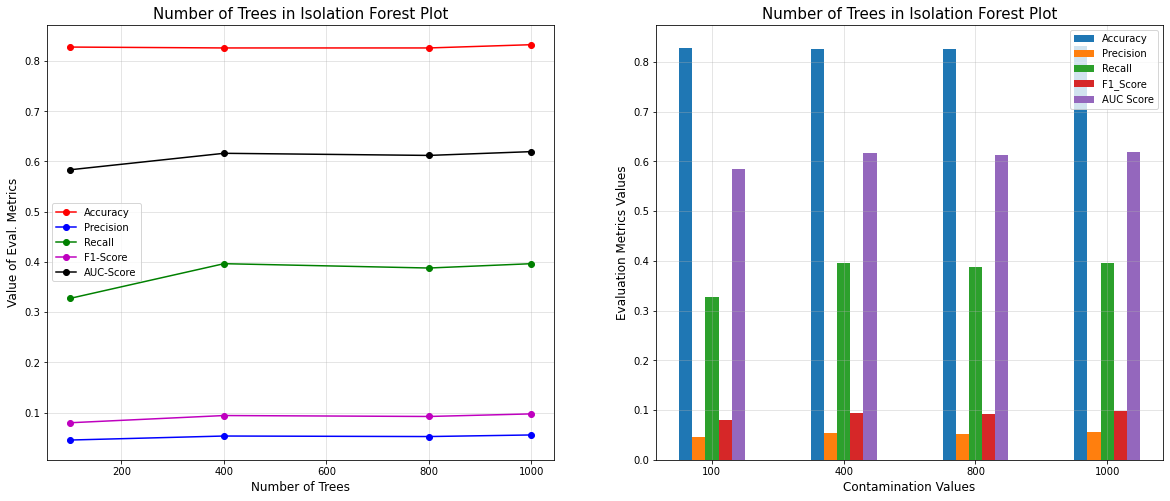

In [122]:
# possible values of n_estimators
poss_val_estimators = [100, 400, 800, 1000]
result = iso_forest_eval.plot_metrics_estimators(poss_val_estimators)

<h3>Observations</h3>
<p>Observations are as follows:
    <ol>
        <li>For values of <code>n_estimators = [400, 800, 1000],</code>values of each of the evaluation parameters remains almost the same.</li>
        <li>Thus, we can go ahead with <strong><code>n_estimators=400.</code></li>
      </ol>
</p>

In [124]:
# printing the confusion matrix and evaluation metrics table:
iso_forest_eval.get_conf_matrix_eval_metrics_estimators(poss_val_estimators)

Actual Number of Outliers Present -->  116

Number of Outlier Points detected -->  737
For Model with n_estimator=100, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4271     694
Actual-1      73      43

Evaluation metrics for model with n_estimator=100 :
           Validation Metrics
Accuracy             0.849045
Precision            0.058345
Recall               0.370690
F1-Score             0.100821
AUC Score            0.615456


Number of Outlier Points detected -->  882
For Model with n_estimator=400, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4132     833
Actual-1      67      49

Evaluation metrics for model with n_estimator=400 :
           Validation Metrics
Accuracy             0.822870
Precision            0.055556
Recall               0.422414
F1-Score             0.098196
AUC Score            0.627320


Number of Outlier Points detected -->  792
For Model with n_estimator=800, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4218     747
Actual-

<li>Insight: <strong>The best value chosen for <code>n_estimators=400</code></li>

<h3>Choosing Best Value of <code>contamination</code>:</h3>

In [126]:
iso_forest_eval = PlotEvaluationMetricIsolationForest(y_val)
iso_forest_eval

In [127]:
dir(iso_forest_eval)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_conf_matrix_eval_metrics_cont',
 'get_conf_matrix_eval_metrics_estimators',
 'plot_metrics_cont',
 'plot_metrics_estimators',
 'y_val']

Classifier with contamination=0.001123 is done
Classifier with contamination=0.0123 is done
Classifier with contamination=0.054 is done
Classifier with contamination=0.092 is done


{'accuracy_list': [0.9748081086400315,
  0.9492225939775635,
  0.9134028734501083,
  0.8746309781539067],
 'precision_list': [0.0,
  0.03289473684210526,
  0.052486187845303865,
  0.057724957555178265],
 'recall_list': [0.0,
  0.04310344827586207,
  0.16379310344827586,
  0.29310344827586204],
 'f1_score_list': [0.0,
  0.0373134328358209,
  0.07949790794979078,
  0.09645390070921984],
 'auc_score_list': [0.4987915407854985,
  0.5067480987602876,
  0.547354759176303,
  0.5906604854672362]}

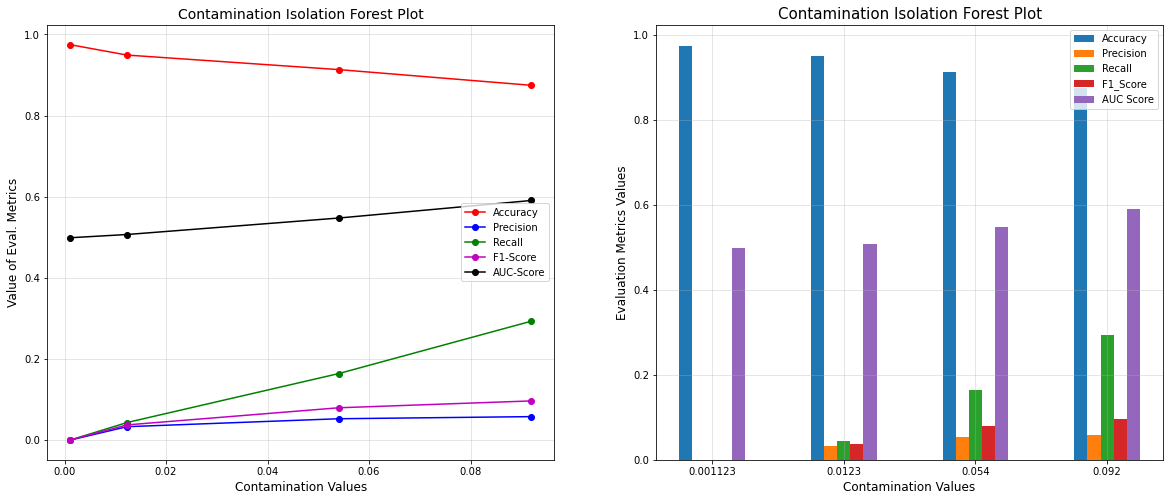

In [129]:
# possible values of contamination in order to find the best value of contamination:
poss_val_contamination = [0.001123, 0.0123, 0.054, 0.092]
result = iso_forest_eval.plot_metrics_cont(poss_val_contamination, 400)

<h3>Observations</h3>
<p>Observations are as follows:
    <ol>
        <li><strong>The performance of Isolation Forest Algorithm to isolate the outliers on fraudulent data does not seem to work as good as Local Outlier Factor seems to isolate the outliers.</strong></li>
        <li>It could be found from the above analysis that even if after increasing the value of contamination, <strong>quite few of them were only correclty classified and most of them were misclassified.</strong> </li>
        <li>Thus, we can <strong>finally choose LocalOutlierFactor to predict whether the transaction seems to be fraudulent or not.</strong></li>
        </ol>
</p>

In [131]:
# printing the evaluation metrics table and confusion matrix:
iso_forest_eval.get_conf_matrix_eval_metrics_cont(poss_val_contamination, 400)

Actual Number of Outliers Present -->  116

Number of Outlier Points detected -->  11
For Model with contamination=0.001123, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4954      11
Actual-1     116       0

Evaluation metrics for model with contamination=0.001123 :
           Validation Metrics
Accuracy             0.975005
Precision            0.000000
Recall               0.000000
F1-Score             0.000000
AUC Score            0.498892


Number of Outlier Points detected -->  155
For Model with contamination=0.0123, Confusion Matrix:
          Pred-0  Pred-1
Actual-0    4814     151
Actual-1     112       4

Evaluation metrics for model with contamination=0.0123 :
           Validation Metrics
Accuracy             0.948239
Precision            0.025806
Recall               0.034483
F1-Score             0.029520
AUC Score            0.502035


Number of Outlier Points detected -->  355
For Model with contamination=0.054, Confusion Matrix:
          Pred-0  Pred-1
Actua

<li>Insight: <strong> The best model which we are getting from Isolation Forest is having the <code>f1_score=0.08</code>. Howeverm te best model with Local Outlier Factor has <code>f1_score=0.19</code></li>

<h2>Visualizing Validation Data using PCA:</h2>

In [55]:
# reducing dimensions of data using PCA an plotting the actual and predicted labels:
from sklearn.decomposition import PCA
def plotting_predicted_actual_labels(model, data, actual_labels, pred_labels):
    
    # fitting data whose dimensions are to be reduced:
    pca = PCA(n_components=2)
    pca.fit(data)
    
    # storing the explained variance ratio:
    pc_1_variance, pc_2_variance = list(pca.explained_variance_ratio_)
    print("Variance Explained by 1st Principal Component --> ", pc_1_variance, "%")
    print("Variance Explained by 2nd Principal Component --> ", pc_2_variance, "%")
    print("=======================================================================", end="\n\n")
    
    # getting the principal components:
    princ_comp = pca.components_.T
    
    # getting the compressed data by computing the dot product of data and its principal components:
    comp_data = np.dot(data, princ_comp)
    
    # plotting graphs:
    plt.figure(figsize=(15, 6))

    # first Plot: Represents Actual Labels:
    plt.subplot(1, 2, 1);
    plt.scatter(comp_data[:, 0], comp_data[:, 1], c=actual_labels, cmap='cool')
    plt.title("Actual Labels of Validation Data", fontsize=12)
    plt.xlabel("Princ Comp 1", fontsize=11)
    plt.ylabel("Princ Comp 2", fontsize=11)
    plt.grid(True, alpha=0.3)

    # first Plot: Represents Predicted labels:
    plt.subplot(1, 2, 2);
    plt.scatter(comp_data[:, 0], comp_data[:, 1], c=pred_labels, cmap='autumn')
    plt.title("Predicted Labels of Validation Data", fontsize=12)
    plt.xlabel("Princ Comp 1", fontsize=11)
    plt.ylabel("Princ Comp 2", fontsize=11)
    plt.grid(True, alpha=0.3)

In [52]:
# training and making predictions on validation data using the best evaluated model of lof:
def make_val_pred_lof(model, x_train=x_train, x_val=x_val):
    # fitting the training data:
    model.fit(x_train)

    # making predictions:
    y_val_pred = model.predict(x_val) 
    return y_val_pred

In [53]:
# creating a model of LOF and evaluating them visually by plotting its prediction and actual labels on graph: 
final_lof_model = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.01123)
y_val_pred = make_val_pred_lof(final_lof_model)

Variance Explained by 1st Principal Component -->  0.4354774907478828 %
Variance Explained by 2nd Principal Component -->  0.3045701097618125 %



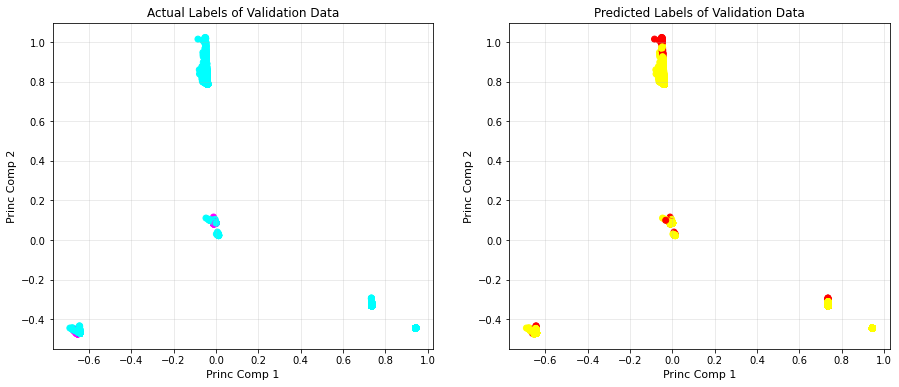

In [56]:
# calling the function to print the predicted and actual labels:
plotting_predicted_actual_labels(final_lof_model, x_val, y_val, y_val_pred)

<h3>Observations</h3>
<p>Observations are as follows:
    <ol>
        <li>The above plot represents the actual and predicted labels of the <strong> Local Outlier Factor Model whose f1_score and auc_score was maximum.</li>
        <li>However, there seems to be a flaw in this model since the predicted labels are not that accurate.</li>
        <li>The above point could be illustrated --> Actual Fraudulent Labels seems to be present only in 2 clusters where as Predicted Fraudelent Labels seems to be present almost in all of the clusters. </li>
        <li>Thus, this model does not work as well we thought since the predicted fraud labels are too much</li>
          </ol>
</p>

In [58]:
# thus we train another Local Outlier Factor keeping contamination=0.001123 i.e. the real proportion of fraudulent data: 
# creating a model of LOF and evaluating them visually by plotting its prediction and actual labels on graph: 
final_lof_model = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.001123)
y_val_pred = make_val_pred_lof(final_lof_model)

Variance Explained by 1st Principal Component -->  0.4354774907478828 %
Variance Explained by 2nd Principal Component -->  0.30457010976181126 %



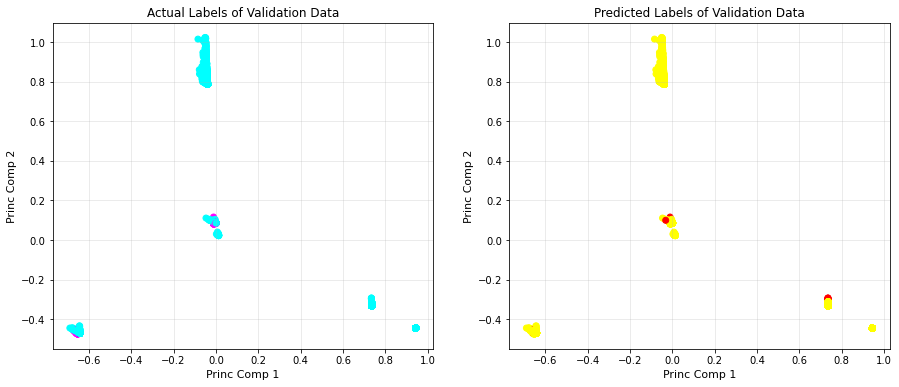

In [59]:
# calling the function to print the predicted and actual labels:
plotting_predicted_actual_labels(final_lof_model, x_val, y_val, y_val_pred)

<h3>Observations</h3>
<p>Observations are as follows:
    <ol>
        <li>The model<strong> <code>LocalOutlierFactor(n_neighbors=20, contamination=0.0011, novelty=True)</code> seems to work really well as can be viewed from the above graph.</li>
        <li>Most of the predictions seems to go correct although some of them are misclassified (the red data points in 2nd graph towards bottom-right part of the plot).</li>
        <li>Thus, we can consider the above model as final and make realtime predictions on real-time data.</li>
            </ol>
</p>

<h2>Saving the model in Disk:</h2>

In [49]:
from sklearn.neighbors import LocalOutlierFactor
final_lof_model = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.001123)
final_lof_model.fit(x_train)

LocalOutlierFactor(contamination=0.001123, novelty=True)

In [50]:
import joblib

#saving the models file:
joblib_file = "joblib_local_outlier_factor_fd.pkl"
joblib.dump(final_lof_model, joblib_file)

['joblib_local_outlier_factor_fd.pkl']

In [51]:
# reading from the saved file:
fd_model = joblib.load("joblib_local_outlier_factor_fd.pkl")
fd_model

LocalOutlierFactor(contamination=0.001123, novelty=True)

In [70]:
# anomalies are represented with -1, so we represent them using 1:
result = lof_model.predict(x_val[-50:])
result = np.where(result==-1, 1, 0)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [50]:
x_train.columns

Index(['step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'oldbalanceOrig', 'diff_orig', 'diff_orig_dest', 'type_PAYMENT',
       'type_TRANSFER', 'type_CASH_OUT', 'type_DEBIT', 'type_CASH_IN'],
      dtype='object')

In [72]:
orig_data_copy["diff_orig_dest"]

0         0
1         0
2         0
3         0
4         0
         ..
101608    0
101609    0
101610    1
101611    0
101612    0
Name: diff_orig_dest, Length: 101613, dtype: int32

In [52]:
len(['step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'oldbalanceOrig', 'diff_orig', 'diff_orig_dest', 'type_PAYMENT',
       'type_TRANSFER', 'type_CASH_OUT', 'type_DEBIT', 'type_CASH_IN'])

12

In [53]:
num_feats = ['step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrig', 'diff_orig']
cat_feats = ['diff_orig_dest', 'type_PAYMENT', 'type_TRANSFER', 'type_CASH_OUT', 'type_DEBIT', 'type_CASH_IN']

In [58]:
import numpy as np
import joblib
import pandas as pd

class DetectFraudulentTransaction:

    # engineering new features based upon the data entered by the Bank Manager:
    def engineer_new_feats(self, data):
        # engineering features in realtime:
        data["diff_orig"] = data["newbalanceOrig"] - data["oldbalanceOrig"]
        data["diff_dest"] = data["newbalanceDest"] - data["oldbalanceDest"]
        
        if (data["diff_orig"]==data["diff_dest"]):
            data["diff_orig_dest"] = 1.0
        else:
            data["diff_orig_dest"] = 0.0
            
        return data

    # we also need to preprocess the data based upon Min-Max Scaling so that all the features 
    # have same scale:
    def scaling_num_data(self, data, imp_num_feats):
        min_val_feats = [1.0, 0.0, 0.0, 0.0, 0.0, -10000000.00]
        range_feats = [9.0, 38946233.02, 34008736.98, 38946233.02, 38939424.03, 11289407.91]
        for idx in range(len(imp_num_feats)):
            data[imp_num_feats[idx]] = (data[imp_num_feats[idx]] - min_val_feats[idx])/range_feats[idx]
        return data


    # preprocessing Categorical Features:
    def encoding_cat_feats(self, data, imp_cat_feats):
        feats_updated = []

        # assigning values for purchase related categorical feats:
        if (data['type'] == 'PAYMENT'):
            data['type_PAYMENT'] = 1
            feats_updated.append('type_PAYMENT')
            
        elif (data['type'] == 'TRANSFER'):
            data['type_TRANSFER'] = 1
            feats_updated.append('type_TRANSFER')
            
        elif (data['type'] == 'CASH_OUT'):
            data['type_CASH_OUT'] = 1
            feats_updated.append('type_CASH_OUT')
            
        elif (data['type'] == 'DEBIT'):
            data['type_DEBIT'] = 1
            feats_updated.append('type_DEBIT')
            
        elif (data['type'] == 'CASH_IN'):
            data['type_CASH_IN'] = 1
            feats_updated.append('type_CASH_IN')
            
        else:
            pass
        
        # non-updated feats:
        non_updated_feats = list(set(imp_cat_feats).symmetric_difference(set(feats_updated)))
        
        # assigning the non-updated feats to 0:
        for feat in non_updated_feats:
            data[feat] = 0.0
            
        return data

    # bringing data to the format as we need to pass it through the trained model:
    def final_data_to_pass(self, data):
        final_data_pass = np.array([data['step'],
                                data['newbalanceOrig'],
                                data['oldbalanceDest'],
                                data['newbalanceDest'],
                                data['oldbalanceOrig'],
                                data['diff_orig'],
                                data['diff_orig_dest'],
                                data['type_PAYMENT'],
                                data['type_TRANSFER'],
                                data['type_CASH_OUT'],
                                data['type_DEBIT'],
                                data['type_CASH_IN']]).reshape(1, 12)
        return final_data_pass

    # preprocessing data in one go:
    def preprocess_at_one_go(self, data, imp_cat_feats, imp_num_feats):
        new_data = self.engineer_new_feats(data)
        num_scaled_data = self.scaling_num_data(new_data, imp_num_feats)
        cat_scaled_data = self.encoding_cat_feats(num_scaled_data, imp_cat_feats)
        final_data = self.final_data_to_pass(cat_scaled_data)
        final_dataframe = pd.DataFrame(final_data, columns= ['step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','oldbalanceOrig', 'diff_orig', 'diff_orig_dest', 'type_PAYMENT','type_TRANSFER', 'type_CASH_OUT', 'type_DEBIT', 'type_CASH_IN'])
        # print(final_data)
        print(final_dataframe)
        return final_dataframe

    # loading model:
    def load_model(self):
        fd_model = joblib.load("joblib_local_outlier_factor_fd.pkl") 
        return fd_model

    # encoding final result:
    def encoding_result(self, result):
        final_result = ''
        if (result['predicted_class'] == -1):
            final_result =  'Fraudulent Transaction'
        else:
            final_result =  'Normal Transaction'
        return final_result

    # making final predictions using the Voting Classifier:
    def make_predictions(self, data_to_predict, imp_cat_feats, imp_num_feats):
        preprocessed_data = self.preprocess_at_one_go(data_to_predict, imp_cat_feats, imp_num_feats)
        model = self.load_model()
        pred_class = model.predict(preprocessed_data)[0]
        result = {'predicted_class' : pred_class}
        final_result = self.encoding_result(result)
        return final_result

In [59]:
# testing the above deployement code:

# dummy data on which prediction needs to be done:
# dummy data on which we are testing:
test_data = {"step": 3.0,
            "newbalanceOrig": 2121278.2,
            "oldbalanceDest": 2233232.2,
            "newbalanceDest": 3459090.2,
            "oldbalanceOrig": 23334334.98,
            "type": "TRANSFER"}

# # # Range of Numerical Feats on which model is trained: 
# # # Range of step --> 1 to 10
# # # Range of newbalanceOrig --> 0.0 to 38946233.02
# # # Range of oldbalanceDest --> 0 to 34008736.98
# # # Range of newbalanceDest --> 0 to 38946233.02
# # # Range of oldbalanceOrig --> 0 to 38939424.03


# # declaring imp_num_feats list:
imp_num_feats = ['step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrig', 'diff_orig']
imp_cat_feats = ['diff_orig_dest', 'type_PAYMENT', 'type_TRANSFER', 'type_CASH_OUT', 'type_DEBIT', 'type_CASH_IN']

# creating the instance of LoanRepayemntProcessing:
det_fraud_transaction = DetectFraudulentTransaction()
final_result = det_fraud_transaction.make_predictions(data_to_predict=test_data, imp_cat_feats=imp_cat_feats, imp_num_feats=imp_num_feats)
print("Final Result--> ", final_result, end="\n\n")

       step  newbalanceOrig  oldbalanceDest  newbalanceDest  oldbalanceOrig  \
0  0.222222        0.054467        0.065666        0.088817        0.599247   

   diff_orig  diff_orig_dest  type_PAYMENT  type_TRANSFER  type_CASH_OUT  \
0  -0.993237             0.0           0.0            1.0            0.0   

   type_DEBIT  type_CASH_IN  
0         0.0           0.0  
Final Result-->  Fraudulent Transaction



In [57]:
x_train.columns

Index(['step', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'oldbalanceOrig', 'diff_orig', 'diff_orig_dest', 'type_PAYMENT',
       'type_TRANSFER', 'type_CASH_OUT', 'type_DEBIT', 'type_CASH_IN'],
      dtype='object')

In [ ]:
# for backup:
# engineering features in realtime:
        data["diff_orig"] = data["newbalanceOrig"] - data["oldbalanceOrig"]
        data["diff_dest"] = data["newbalanceDest"] - data["oldbalanceDest"]
        data["diff_orig_dest"] = np.where(data["diff_orig"]==data["diff_dest"], 1, 0)
        return data


min_val_feats = [1.0, 0.0, 0.0, 0.0, 0.0, -10000000.00]
range_feats = [9.0, 38946233.02, 34008736.98, 38946233.02, 38939424.03, 11289407.91]


if (data['type'] == 'PAYMENT'):
            data['type_PAYMENT'] = 1
            feats_updated.append('type_PAYMENT')
            
        elif (data['type'] == 'TRANSFER'):
            data['type_TRANSFER'] = 1
            feats_updated.append('type_TRANSFER')
            
        elif (data['type'] == 'CASH_OUT'):
            data['type_CASH_OUT'] = 1
            feats_updated.append('type_CASH_OUT')
            
        elif (data['type'] == 'DEBIT'):
            data['type_DEBIT'] = 1
            feats_updated.append('type_DEBIT')
            
        elif (data['type'] == 'CASH_IN'):
            data['type_CASH_IN'] = 1
            feats_updated.append('type_CASH_IN')
            
            
            
final_data_pass = np.array([data['step'],
                                data['newbalanceOrig'],
                                data['oldbalanceDest'],
                                data['newbalanceDest'],
                                data['oldbalanceOrig'],
                                data['diff_orig'],
                                data['diff_orig_dest'],
                                data['type_PAYMENT'],
                                data['type_TRANSFER'],
                                data['type_CASH_OUT'],
                                data['type_DEBIT'],
                                data['type_CASH_IN']])

In [67]:
x_train.iloc[:2, :]

,step,newbalanceOrig,oldbalanceDest,newbalanceDest,oldbalanceOrig,diff_orig,diff_orig_dest,type_PAYMENT,type_TRANSFER,type_CASH_OUT,type_DEBIT,type_CASH_IN
45162,0.888889,0.0,0.0,0.009542,0.008826,0.855343,0,0,0,1,0,0
22751,0.777778,0.0,0.0,0.000000,0.000000,0.885786,1,1,0,0,0,0


<h3>Observations</h3>
<p>Observations are as follows:
    <ol>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
        </ol>
</p>